## BEST NEIGHBORHOOD

https://data.wprdc.org/dataset/police-incident-blotter 

https://data.wprdc.org/dataset/arrest-data

https://data.wprdc.org/dataset/pbp-fire-arm-seizures


For our project, we are going to find out which is the best neighborhood in Pittsburgh to commit a crime (and avoid doing so). There are three metrics that will support our argument. First, we picked a dataset that related to police blotter (activity) within the last 30 days to uphold recency. Secondly, we found a dataset relating arrests made within certain neighborhoods. Finally, we can know what neighborhoods have frequent firearm activity by analyzing the police firearms seizure dataset.

In [37]:
#Imports
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import pyplot
from pandas import *
import random


#Read data from csv files
policeIncidents = pd.read_csv("policeBlotter.csv")
arrests = pd.read_csv("arrestData.csv")
firearmSeizures = pd.read_csv("firearmIncidents.csv")

#make dictionaries
policeBlotter_dict = dict()
arrests_dict = dict()
firearms_dict = dict()

In [38]:
for i in range(len(policeIncidents.index)):
    word = policeIncidents.loc[i, "INCIDENTNEIGHBORHOOD"]
    if word in policeBlotter_dict:
        policeBlotter_dict[word] = policeBlotter_dict[word] + 1
    else:
        policeBlotter_dict[word] = 1
        
for j in range(len(arrests.index)):
    word = arrests.loc[j, "INCIDENTNEIGHBORHOOD"]
    if word in arrests_dict:
        arrests_dict[word] = arrests_dict[word] + 1
    else:
        arrests_dict[word] = 1
        
for k in range(len(firearmSeizures.index)):
    word = firearmSeizures.loc[k, "neighborhood"]
    if word in firearms_dict:
        firearms_dict[word] = firearms_dict[word] + 1
    else:
        firearms_dict[word] = 1
        

policeBlotter_series = pd.Series(policeBlotter_dict, name = "Police")
arrests_series = pd.Series(arrests_dict, name = "Arrests")
firearms_series = pd.Series(firearms_dict, name = "Firearms")

# Police Activity🚨

If you're trying to do "something", it will better that there is less people in the place you picked, especially the police. So the first thing which we are going to do with our plan is that we need to go through the policeBlotter data file, and comparing amount of police activities for each neighborhood.

In [39]:
policeBlotter_series.sort_values()[:]

Ridgemont                      1
Outside County                 1
Summer Hill                    2
Hays                           2
Swisshelm Park                 2
                            ... 
Brookline                     79
Mount Washington              96
Carrick                      105
South Side Flats             135
Central Business District    253
Name: Police, Length: 94, dtype: int64

Text(0, 0.5, 'Total amount of police activity')

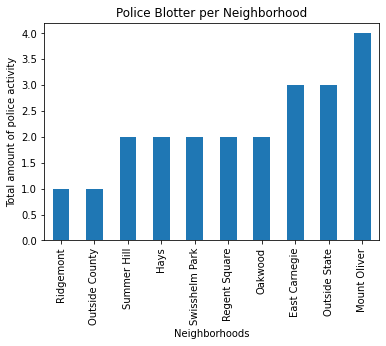

In [40]:
policeBlotter_series.sort_values(ascending=True)[:10].plot.bar()
plt.title('Police Blotter per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of police activity')

# Be careful! Don't be one of them! 🙅‍♂️

This set of data is showing the total amount of arrests in each neighborhood. Neighborhoods with more arrests represent more police attention to those neighborhoods. Therefore we are going to find out the neighborhood which has the least arrested number.

In [41]:
arrests_series.sort_values()[:]

Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      32
                             ... 
East Allegheny               1893
Carrick                      2102
NaN                          2203
South Side Flats             3053
Central Business District    3570
Name: Arrests, Length: 99, dtype: int64

Text(0, 0.5, 'Total amount of arrests')

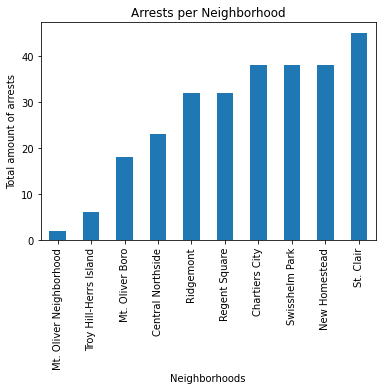

In [42]:
arrests_series.sort_values(ascending=True)[:10].plot.bar()
plt.title('Arrests per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of arrests')

# Be low key🥷

Here, we analyze the dataset which is about the firearm seizures. Just like the arresets data, neighborhoods with more firearms obtained represent more police attention to those neighborhoods.

In [43]:
firearms_series.sort_values()[:]

Swisshelm Park        1
Summer Hill           2
Mt. Oliver            3
Friendship            3
Oakwood               4
                   ... 
Carrick             114
Homewood North      130
South Side Flats    177
Homewood South      250
NaN                 771
Name: Firearms, Length: 89, dtype: int64

Text(0, 0.5, 'Total amount of firearms obtained')

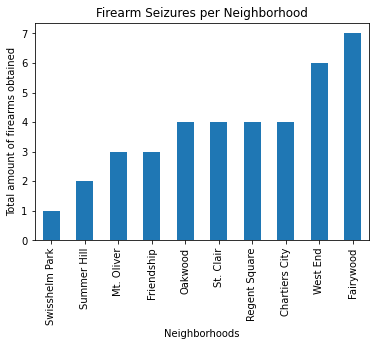

In [44]:
firearms_series.sort_values(ascending=True)[:10].plot.bar()
plt.title('Firearm Seizures per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of firearms obtained')

# Wrap up 💡

In [45]:
final_dict = dict()

# iterate through the dataframe
for i in range(len(policeIncidents.index)):
    word = policeIncidents.loc[i, "INCIDENTNEIGHBORHOOD"]
    if word in final_dict:
        final_dict[word] = final_dict[word] + 1
    else:
        final_dict[word] = 1

# iterate through the dataframe
for j in range(len(arrests.index)):
    word = arrests.loc[j, "INCIDENTNEIGHBORHOOD"]
    if word in final_dict:
        final_dict[word] = final_dict[word] + 1
    else:
        final_dict[word] = 1

for k in range(len(firearmSeizures.index)):
    word = firearmSeizures.loc[k, "neighborhood"]
    if word in final_dict:
        final_dict[word] = final_dict[word] + 1
    else:
        final_dict[word] = 1

In [46]:
final_series = pd.Series(final_dict, name = "Data")

In [47]:
final_series.sort_values()[:]

Mt. Oliver Neighborhood         2
Mt. Oliver                      3
Troy Hill-Herrs Island          6
Mount Oliver Borough            7
Mt. Oliver Boro                18
                             ... 
Homewood South               2172
Carrick                      2321
NaN                          3006
South Side Flats             3365
Central Business District    3934
Name: Data, Length: 101, dtype: int64

Text(0, 0.5, 'Total Threat Level')

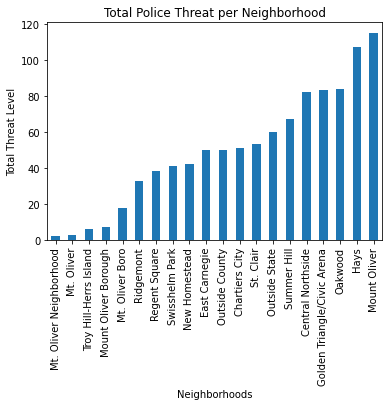

In [49]:
final_series.sort_values(ascending=True)[:20].plot.bar()
plt.title('Total Police Threat per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Threat Level')

# Conclusion: Mount Oliver Wins! (By a landslide)

Honorable Mentions:

Troy Hill-Herrs Island

Ridgemont

Regent Square

Swisshelm Park

New Homestead

Bobby's Reflection: By analyzing these three data sets, we have clearly obtained the data for metrics. And then through the comprehensive evaluation of these data, we finally get a relatively accurate result. So for your safety, be careful when you go to Mount Oliver alone! 

Stephen's Reflection： When it came to the overall best neighborhood, in hindsight making a total dictionary resulted in names like Mount Oliver and Mt. Oliver being separated. In the future, we plan to use another data type or just use a different way to create the final results.

Justin's Reflection: Overall based on the data of total arrests mount Oliver was the best neighborhood.  The data shows mount oliver would be the best place to not get arrested, since it has the least arrests.

<iframe src="https://giphy.com/embed/26uf1bq4LjIMxplVm" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/joker-the-dark-knight-26uf1bq4LjIMxplVm">via GIPHY</a></p>